In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
from transformers import pipeline

In [10]:
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
from PIL import Image
import requests

In [12]:
img_url = "https://multiwood.com.pk/cdn/shop/products/81gWuS-khkL._AC_SL1500_1024x1024@2x.jpg?v=1675512724"
img =  Image.open(
    requests.get(img_url, stream=True).raw).convert('RGB')

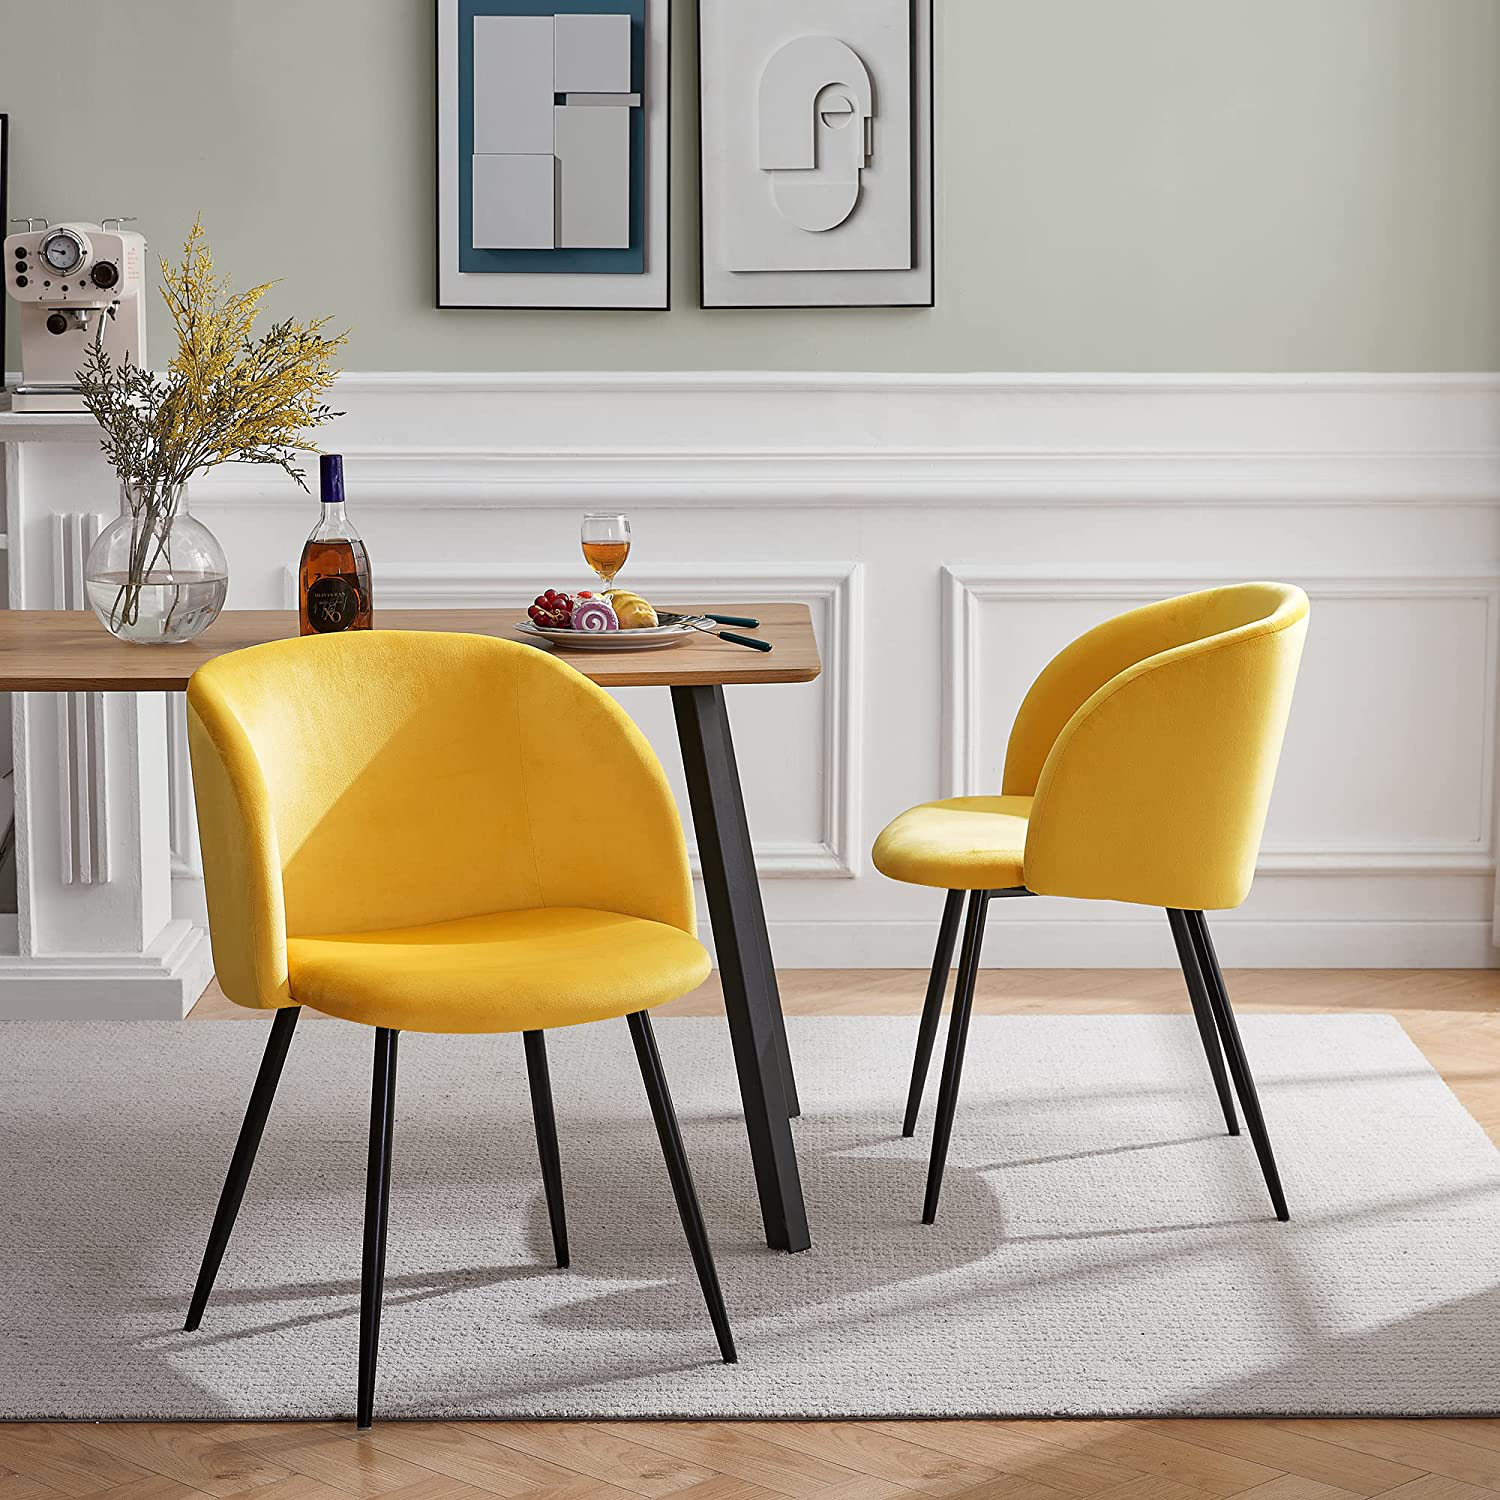

In [13]:
img

In [14]:
output = pipe(img)

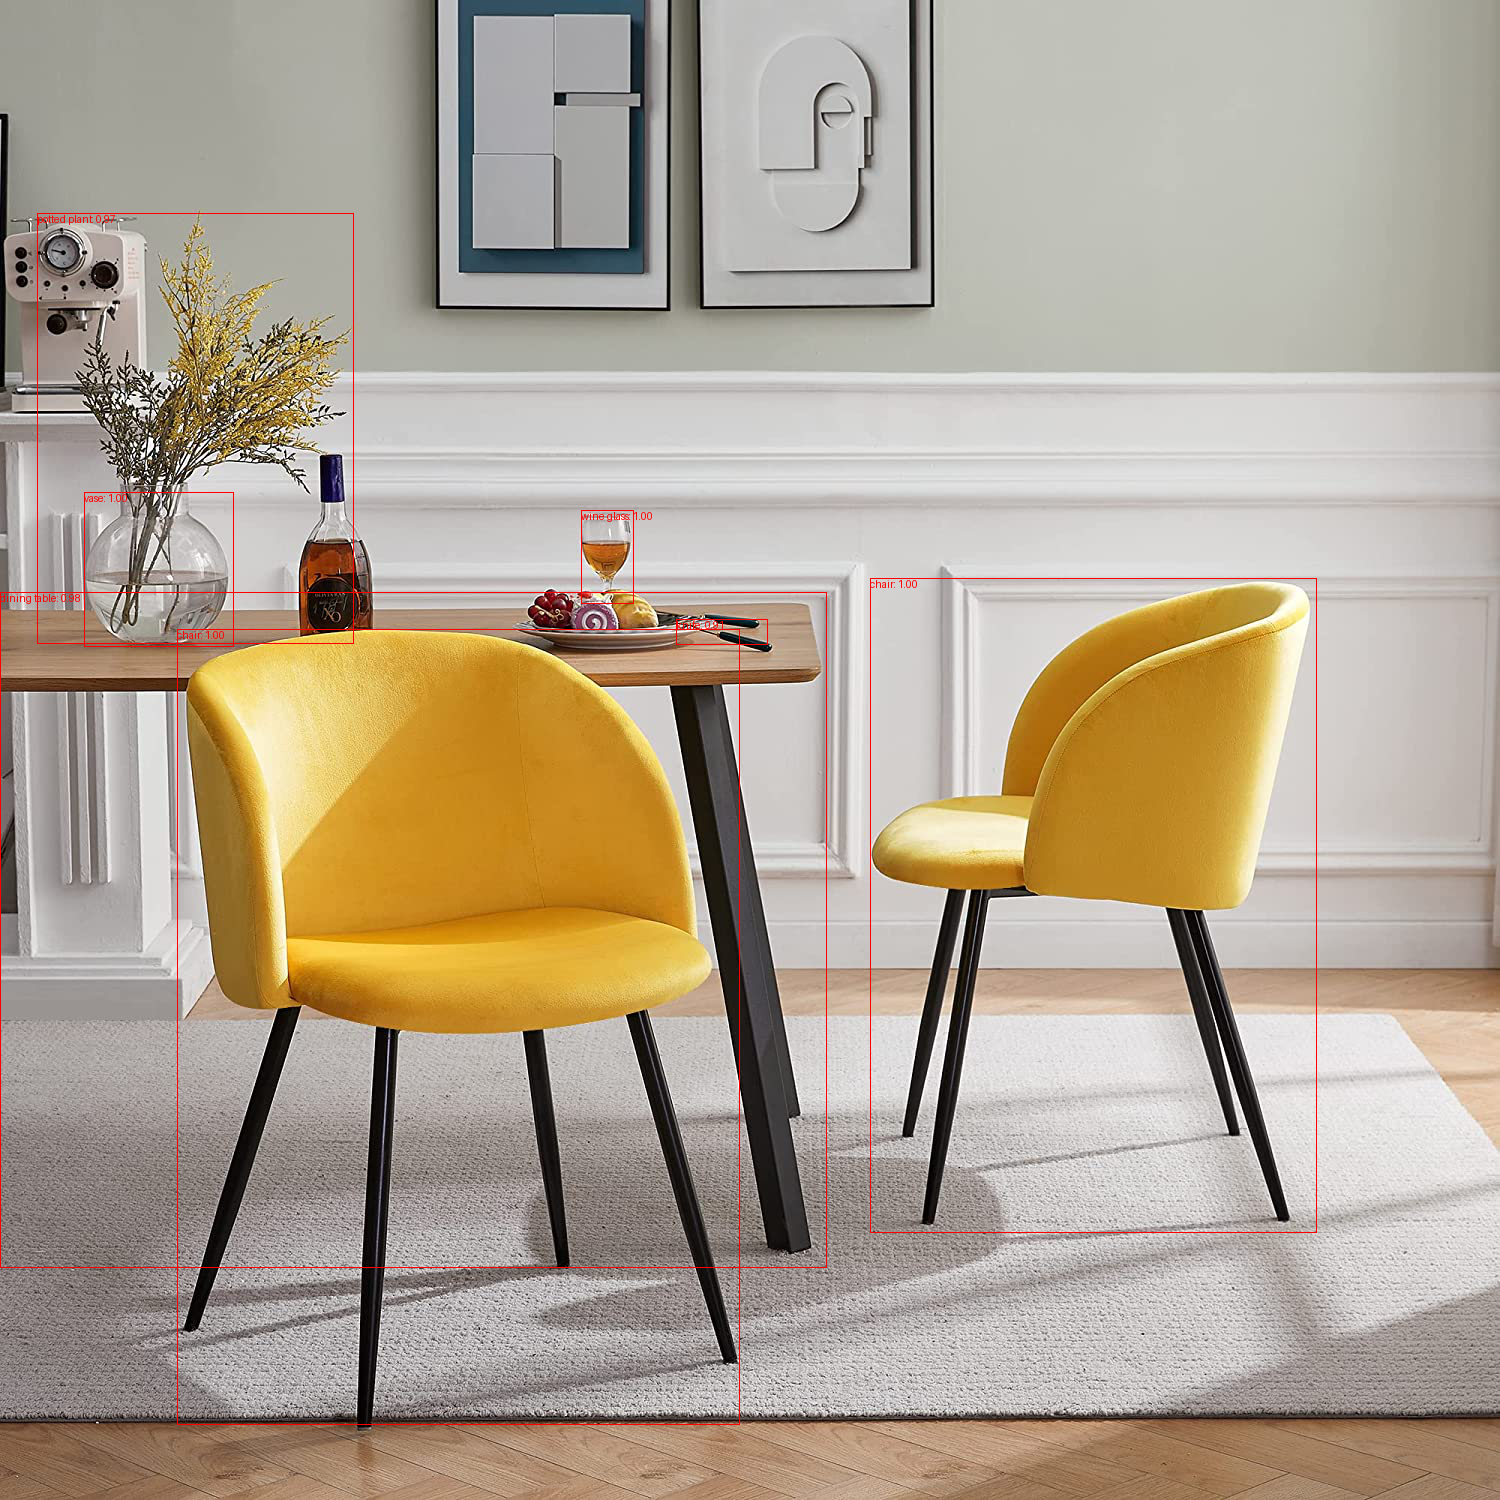

In [15]:
from PIL import Image, ImageDraw

# Render results on image
draw = ImageDraw.Draw(img)
for obj in output:
    # Extract bounding box coordinates
    box = obj['box']
    x_min = box['xmin']
    y_min = box['ymin']
    x_max = box['xmax']
    y_max = box['ymax']
    
    # Draw bounding box
    draw.rectangle([x_min, y_min, x_max, y_max], outline="red")
    
    # Add label and score
    label = obj['label']
    score = obj['score']
    draw.text((x_min, y_min), f"{label}: {score:.2f}", fill="red")

# Display the image with results
from IPython.display import display
display(img)



MAKING A SIMPLE OBJECT DETECTION DEMO USING GRADIO